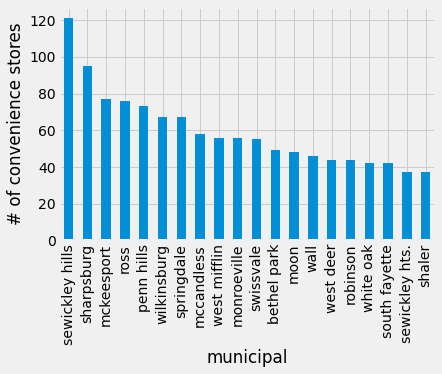

In [60]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

#Dictionary containing each municipal code in pittsburgh to their respective municipal name
municipal_hash = {
    'pittsburgh-119': 'wall',
    'pittsburgh-104': 'sharpsburg',
    'pittsburgh-124': 'west view',
    'pittsburgh-129': 'wilkinsburg',
    'pittsburgh-113': 'thornburg',
    'pittsburgh-110': 'stowe',
    'pittsburgh-111': 'swissvale',
    'pittsburgh-115': 'turtle creek',
    'pittsburgh-112': 'tarentum',
    'pittsburgh-126': 'white oak',
    'pittsburgh-114': 'trafford',
    'pittsburgh-108': 'springdale',
    'pittsburgh-106': 'south park',
    'pittsburgh-102': 'sewickley hills',
    'pittsburgh-107': 'south versailles',
    'pittsburgh-120': 'west deer',
    'pittsburgh-123': 'west mifflin',
    'pittsburgh-109': 'springdale',
    'pittsburgh-116': 'upper st. clair',
    'pittsburgh-131': '0',
    'pittsburgh-101': 'sewickley hts.',
    'pittsburgh-128': 'wilkins',
    'pittsburgh-121': 'west elizabeth',
    'pittsburgh-105': 'south fayette',
    'pittsburgh-122': 'west homestead',
    'pittsburgh-127': 'whitehall',
    'pittsburgh-132': '0',
    'pittsburgh-118': 'versailles',
    'pittsburgh-103': 'shaler',
    'pittsburgh-117': 'verona',
    'pittsburgh-125': 'whitaker',
    'pittsburgh-130': 'wilmerding',
    'east pittsburgh': '0'
}

#Read initial data
stores = pd.read_csv("data/stores.csv")

#Retain only description, municipal, and coordinates of all stores. Drop any that do not contain this information.
gas = stores[['description', 'municipal', 'x', 'y']]
gas = gas.dropna()

#Make all descriptions and municipals lowercase for simplicity of filtering (convenience stores and parsing municipal codes)
gas['description'] = gas['description'].apply(str.lower)
gas['municipal'] = gas['municipal'].apply(str.lower)
gas = gas[gas['description'].str.contains('convenience store')].reset_index()

#Change all entries with codes to municipal names
index = 0
for row in gas.iterrows():
    try:
        m = str(row[1].municipal)
        value = municipal_hash[m]
        gas.at[index,'municipal'] = value
    except:
        continue
    finally:
        index += 1

#Get values of each municipal's convenience store total and plot the top 20
municipal_count_df = pd.DataFrame(gas.groupby('municipal')['municipal'].count())
municipal_count_df.columns = ['# of convenience stores']
municipal_count_df = municipal_count_df[1:]
municipal_count_df = municipal_count_df.sort_values(by='# of convenience stores', ascending=False)
plt.style.use('fivethirtyeight')
municipal_count_df.head(20).plot(kind='bar', legend=False)
plt.ylabel('# of convenience stores')

#Municipal coordinates for plotting them on the municipal map
municipal_cords = gas[['x','y']]

#Custom colors for heatmap (transparent to red)
c_white = matplotlib.colors.colorConverter.to_rgba('white',alpha = 0)
c_black= matplotlib.colors.colorConverter.to_rgba('red',alpha = 1)
cmap_rb = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_white,c_black],512)
            
#municipal_cords.plot(kind='scatter', x='x', y='y', c='red', title="Convenience Stores of Pittsburgh")

x, y = gas['x'].values, gas['y'].values

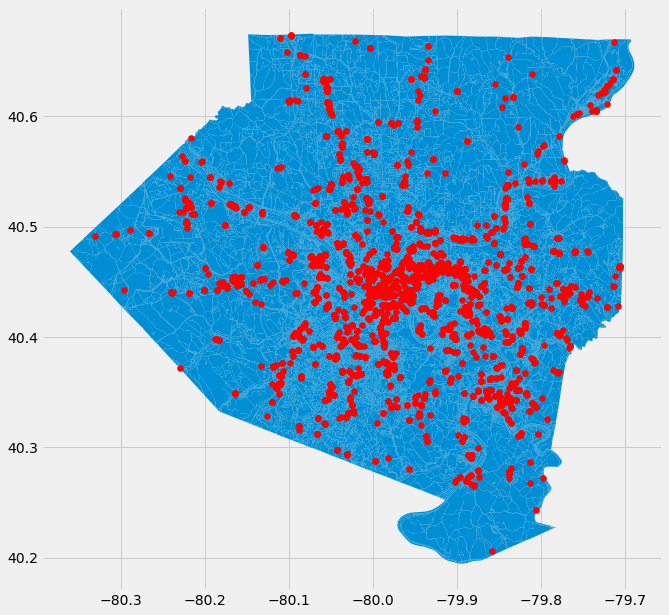

In [61]:
#Map view of each convenience store
import geopandas as gpd
shapefile = gpd.read_file('map_data/tl_2019_42003_faces.shp')
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax)
ax.scatter(x = x,y = y, c='red')

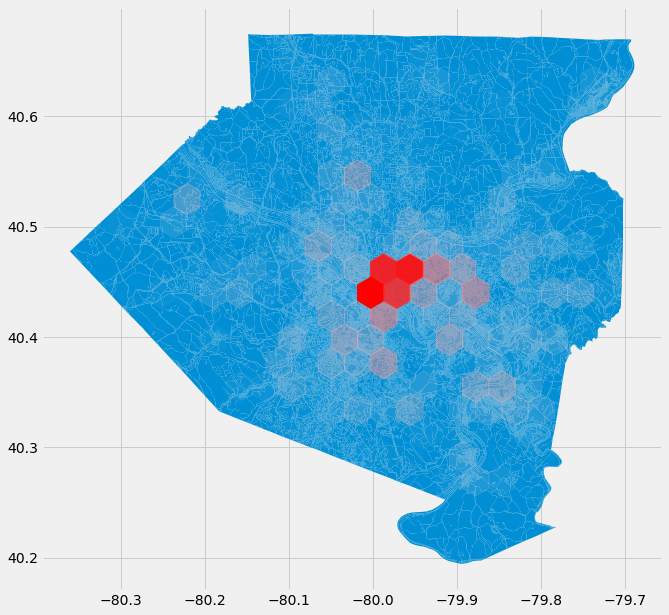

In [62]:
#Heat map view of each convenience store
shapefile2 = gpd.read_file('map_data/tl_2019_42003_faces.shp')
fig2, ax2 = plt.subplots(figsize=(10,10))
shapefile2.plot(ax=ax2)
ax2.hexbin(x = x,y = y, cmap=cmap_rb, gridsize=20)

In [72]:
#Ranking of each municipal
municipal_count_df = municipal_count_df.sort_values(by='# of convenience stores', ascending=False)
municipal_count_df['rank'] = municipal_count_df['# of convenience stores'].rank(ascending=False)
municipal_count_df['rank_perc'] = municipal_count_df['# of convenience stores'].rank(ascending=False) * 0.2

display(municipal_count_df)

,# of convenience stores,rank,rank_perc
municipal,,,
sewickley hills,121,1.0,0.2
sharpsburg,95,2.0,0.4
mckeesport,77,3.0,0.6
ross,76,4.0,0.8
penn hills,73,5.0,1.0
...,...,...,...
east deer,1,114.0,22.8
leet,1,114.0,22.8
mcdonald,1,114.0,22.8
